In [24]:
import pandas as pd
import pmdarima as pm
from sklearn.metrics import mean_absolute_percentage_error

In [25]:
%store -r date_list
%store -r cpi_list
%store -r ppi_list
%store -r unemployed_ratio_list
%store -r update_sp500

In [26]:
case_sp500 = pd.DataFrame()
case_sp500['date'] = date_list
case_sp500['cpi'] = cpi_list
case_sp500['ppi'] = ppi_list
case_sp500['unemployment_ratio'] = unemployed_ratio_list
case_sp500_update = pd.concat([case_sp500, update_sp500], axis=1).dropna()
case_sp500_update['date'] = pd.to_datetime(case_sp500_update['date'])
case_sp500_update = case_sp500_update.set_index('date')
find_sp500_case = case_sp500_update.resample('M').mean()

In [27]:
train=find_sp500_case[(find_sp500_case.index.get_level_values(0) <= '2015-08-31')]
test=find_sp500_case[(find_sp500_case.index.get_level_values(0) > '2015-08-31')]

In [28]:

model_sp500 = pm.auto_arima(train.Price, 
                        exogenous = train[['cpi', 'ppi','unemployment_ratio']], 
                        D=1, 
                        test='adf',
                        m=12,
                        error_action='ignore',  
                        suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.43 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2292.006, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1972.683, Time=1.48 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.03 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2312.752, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2014.383, Time=0.20 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1962.911, Time=6.00 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.70 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.74 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2242.683, Time=3.66 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1967.765, Time=6.41 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=1964.751, Time=5.25 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=2106.404, Time=4.27 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=6.06 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=1

In [29]:
model_sp500.fit(train.Price, exogenous = train[['cpi', 'ppi','unemployment_ratio']])
model_sp500.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  188
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -972.506
Date:                            Mon, 13 Mar 2023   AIC                           1959.011
Time:                                    00:38:09   BIC                           1981.205
Sample:                                01-31-2000   HQIC                          1968.013
                                     - 08-31-2015                                         
Covariance Type:                              opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
cpi                   10.6375      8.487      1.253      0.210      -5.997      27.272
ppi                   -1.7734      4.158     -0.427      0.670      -9.922       6.375
unemployment_ratio   -47.1067     26.565     -1.773      0.076     -99.174       4.960
ar.L1                  0.9663      0.022     43.179      0.000       0.922       1.010
ar.S.L12              -0.6604      0.081     -8.124      0.000      -0.820      -0.501
ar.S.L24              -0.3140      0.071     -4.416      0.000      -0.453      -0.175
sigma2              3533.4790    386.764      9.136      0.000    2775.436    4291.522
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                 7.42
Prob(Q):                              0.41   Prob(JB):                         0.02
Heteroskedasticity (H):               1.11   Skew:                            -0.44
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
# forecast the cpi, ppi, and unemployment_ratio

In [31]:
original_model_sp500_cpi = pm.auto_arima(train.cpi, 
                        D=1, 
                        test='adf',
                        m=12,
                        error_action='ignore',  
                        suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=856.131, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=455.229, Time=0.43 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1080.135, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=504.928, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=429.905, Time=3.49 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.11 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=847.157, Time=1.52 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=391.363, Time=3.25 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=417.092, Time=1.08 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=6.26 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.68 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=387.780, Time

In [32]:
original_model_sp500_cpi.fit(train['cpi'])

ARIMA(order=(3, 0, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True)

/Users/peter/Library/Python/3.6/lib/python/site-packages/IPython/core/interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


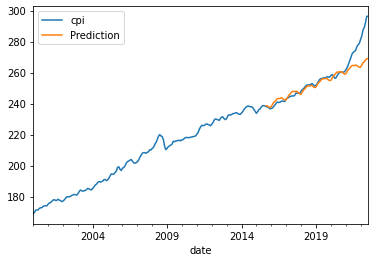

In [34]:
predict_cpi = original_model_sp500_cpi.predict(n_periods=len(test), return_conf_int=True)
cpi_tmp = pd.DataFrame(predict_cpi[0], index = test.index, columns=['Prediction'])
pd.concat([find_sp500_case['cpi'],cpi_tmp],axis=1).plot()
for i in range(83):
    test['cpi'][i] = predict_cpi[0][i]

In [35]:
original_model_sp500_ppi = pm.auto_arima(train.ppi, 
                        D=1, 
                        test='adf',
                        m=12,
                        error_action='ignore',  
                        suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=1.78 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=780.256, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=725.484, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=761.386, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=688.711, Time=0.34 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.67 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=708.856, Time=0.30 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=688.829, Time=0.51 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=689.573, Time=0.54 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=694.750, Time=0.33 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=687.254, Time=1.07 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=724.443, Time=0.26 sec
 ARIMA(2,1,1)(2,1,1)[12]             : AIC=inf, T

In [36]:
original_model_sp500_ppi.fit(train['ppi'])

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

/Users/peter/Library/Python/3.6/lib/python/site-packages/IPython/core/interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


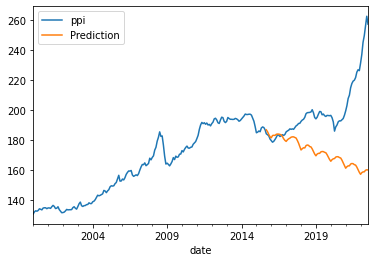

In [38]:
predict_ppi = original_model_sp500_ppi.predict(n_periods=len(test), return_conf_int=True)
ppi_tmp = pd.DataFrame(predict_ppi[0], index = test.index, columns=['Prediction'])
pd.concat([find_sp500_case['ppi'],ppi_tmp],axis=1).plot()
for i in range(83):
    test['ppi'][i] = predict_ppi[0][i]

In [40]:
original_model_sp500_unemployed = pm.auto_arima(train.unemployment_ratio, 
                        D=1, 
                        test='adf',
                        m=12,
                        error_action='ignore',  
                        suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,1,1)[12]             : AIC=inf, Time=1.39 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=95.441, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=-10.436, Time=0.14 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=38.361, Time=0.04 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=-20.606, Time=0.82 sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=inf, Time=3.57 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(0,2,0)(2,1,0)[12]             : AIC=41.872, Time=0.32 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=-36.659, Time=0.92 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=-24.505, Time=0.29 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=5.08 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=1.94 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=-39.592, Time=2.25 sec
 ARIMA(3,2,0)(1,1,0)[12]             : AIC=-27.189, Time=0.6

In [41]:
original_model_sp500_unemployed.fit(train['unemployment_ratio'])

ARIMA(order=(5, 2, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

/Users/peter/Library/Python/3.6/lib/python/site-packages/IPython/core/interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


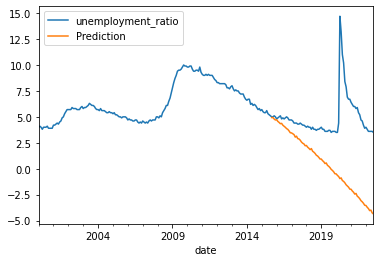

In [43]:
predict_unemployed = original_model_sp500_unemployed.predict(n_periods=len(test), return_conf_int=True)
unemploy_tmp = pd.DataFrame(predict_unemployed[0], index = test.index, columns=['Prediction'])
pd.concat([find_sp500_case['unemployment_ratio'],unemploy_tmp],axis=1).plot()
for i in range(len(test)):
    test['unemployment_ratio'][i] = predict_unemployed[0][i]

In [ ]:
# after updating the test data, ready for forecasting the stock data

0.14562353119672183

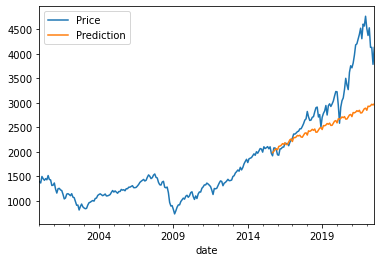

In [44]:
forecast=model_sp500.predict(n_periods=len(test), exogenous = test[['cpi', 'ppi','unemployment_ratio']], return_conf_int=True)
arima_df_2 = pd.DataFrame(forecast[0], index = test.index, columns=['Prediction'])
pd.concat([find_sp500_case['Price'],arima_df_2],axis=1).plot()
mean_absolute_percentage_error(test.Price, arima_df_2['Prediction'])

In [45]:
model_sp500_2 = pm.auto_arima(train.Price, 
                        exogenous = train[['cpi', 'ppi']], 
                        D=1, 
                        test='adf',
                        m=12,
                        error_action='ignore',  
                        suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=3.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2002.975, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1962.909, Time=0.57 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1927.492, Time=0.75 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2004.765, Time=0.17 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1929.475, Time=1.70 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1929.469, Time=3.75 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1962.951, Time=0.51 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=4.88 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1925.641, Time=0.34 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1927.632, Time=0.69 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1927.631, Time=2.19 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1961.951, Time=0.39 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=3.48 sec
 ARIMA(1,1,0)(0,1,1)[12]          

In [46]:
model_sp500_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  188
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -958.820
Date:                              Mon, 13 Mar 2023   AIC                           1925.641
Time:                                      01:02:56   BIC                           1938.300
Sample:                                  01-31-2000   HQIC                          1930.776
                                       - 08-31-2015                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cpi            7.9298     12.113      0.655      0.513     -15.812      31.672
ppi            0.2478      4.949      0.050      0.960      -9.453       9.949
ma.S.L12      -0.8820      0.079    -11.214      0.000      -1.036      -0.728
sigma2      3037.2178    339.812      8.938      0.000    2371.198    3703.237
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                11.97
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.52
Prob(H) (two-sided):                  1.00   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
test

,cpi,ppi,unemployment_ratio,Price
date,,,,
2013-02-28,230.884331,192.346502,7.992558,1514.68
2013-03-31,232.433931,194.203276,8.150035,1569.19
2013-04-30,233.259038,195.229345,8.217967,1597.57
2013-05-31,233.603771,195.429515,8.228568,1630.74
2013-06-30,233.347153,193.934663,8.331739,1606.28
...,...,...,...,...
2022-03-31,274.194779,241.349515,41.568515,4530.41
2022-04-30,275.094852,242.597083,42.215511,4131.93
2022-05-31,275.372716,242.735183,42.788152,4132.15


0.22458025816227217

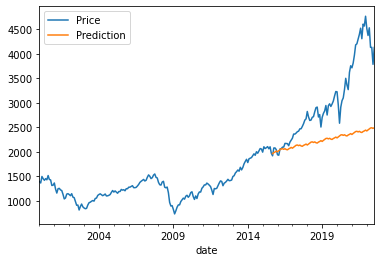

In [47]:
forecast=model_sp500_2.predict(n_periods=len(test), exogenous = test[['cpi', 'ppi']], return_conf_int=True)
arima_df_3 = pd.DataFrame(forecast[0], index = test.index, columns=['Prediction'])
pd.concat([find_sp500_case['Price'],arima_df_3],axis=1).plot()
mean_absolute_percentage_error(test.Price, arima_df_3['Prediction'])

In [48]:
data_arima_variable = arima_df_3.reset_index()
%store data_arima_variable

Stored 'data_arima_variable' (DataFrame)
